In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
bdir='C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\1221 A RZ'
folders=['C','0','13','27','40']


## Import Data

In [2]:
#w0=540
w0=range(450,700)
#w1=770
w1=range(750,900)
data=[]
df2=pd.DataFrame(columns=['Position','Current','Intensity1','Intensity2','Device'])
currents=[25,50,100,150,250,500,750,1000,1500,2000]
positions=[-1,0,13,27,40]
noc1=[.253,.252,.267,.253,.211]
noc2=[.121,.162,.137,.105,.075]
#cs=['blue','red','green','purple','cyan']
for fix,fold in enumerate(folders):
    data.append([])
    sdirs=next(os.walk(os.path.join(bdir,fold)))[1]
    for dix,d in enumerate(sdirs):
        data[fix].append([[0,0,0]]*len(currents))
        os.chdir(os.path.join(bdir,fold,d))
        files=glob.glob('*.csv')
        for f in files:
            current=f.split('.')[0]
            if current[-1]=='m':
                current=int(current[:-1])*1000
            else:
                current=int(current[:-1])
            #currents.append(current)
            cix=currents.index(current)
            df=pd.read_csv(f)
            if current>499:
                df['Intensity']=df['Intensity']*5
            if current > 1999:
                df['Intensity']=df['Intensity']*5
            df['mavg_Intensity']=df['Intensity'].rolling(8).mean()
            #pW0=np.interp(w0,df['Wavelength'],df['mavg_Intensity'])
            pW0=np.trapz(np.interp(w0,df['Wavelength'],df['mavg_Intensity']),w0)
            #pW1=np.interp(w1,df['Wavelength'],df['mavg_Intensity'])
            pW1=np.trapz(np.interp(w1,df['Wavelength'],df['mavg_Intensity']),w1)
            waves=df['Wavelength']
            row={'Position':positions[fix],'Current':current,'Intensity1':pW0,'Intensity2':pW1,'CorrectedIntensity1':pW0/noc1[fix],'CorrectedIntensity2':pW1/noc2[fix],'Device':d}
            #print row
            df2=df2.append(row,ignore_index=True)


StopIteration: 

## Drop devices I don't trust

In [ ]:
#df2=df2.drop(df2[df2['Position']==-1][df2['Device']=='C2'].index)
#e= df2[df2['Position']==-1][df2['Device']=='C1'][df2['Current']==750]
#df2.at[e.index,'Intensity1']=e['Intensity1']*5
#df2.at[e.index,'Intensity2']=e['Intensity2']*5

#e2= df2[df2['Position']==-1][df2['Device']=='C3'][df2['Current']==1500]
#df2.at[e2.index,'Intensity1']=e2['Intensity1']*5
#df2.at[e2.index,'Intensity2']=e2['Intensity2']*5

#df2=df2.drop(df2[df2['Position']==13][df2['Device']=='B1'].index)
#df2=df2.drop(df2[df2['Position']==13][df2['Device']=='B3'].index)
#df2=df2.drop(df2[df2['Position']==27][df2['Device']=='B3'].index)
#df2=df2.drop(df2[df2['Position']==27][df2['Device']=='B1'].index)
#df2=df2.drop(df2[df2['Position']==40][df2['Device']=='A4'].index)
df2=df2.drop(df2[df2['Position']==13][df2['Device']=='14'].index)

## Data Validation

Position 0 does not have reproducibility and there are 2 points on the control I don't trust a lot.  I think the control is due to switching integration times.  Position 0 I just didn't have good yield.

In [ ]:
cs=['blue','red','green','purple','cyan','pink','grey']
plt.figure(figsize=(8,5))
for i,p in enumerate(sorted(set(df2['Position']))):
    plt.subplot(2,3,i+1)
    f1=df2[df2['Position']==p]
    for dix,d in enumerate(sorted(set(f1['Device']))):
    #if not p==-1:
    #    print p
        f=f1[f1['Device']==d]
        ratio=f['Intensity2']/f['Intensity1'] 
        plt.scatter(f['Current'],f['Intensity1'],color=cs[dix],label=list(f['Device'])[0])
        
        #plt.title('X Position: ' + str(p) + ' nm')
#plt.yscale('log')
    plt.xlabel('Current (uA)')
    plt.ylabel('Intensity1')
#plt.xscale('log')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.legend(loc=2)
    plt.title(p)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
plt.tight_layout()
plt.show()
#print df2[df2['Position']==0]

## Recombination Zone based off PtTPTBP

I'm not sure how much I trust the 27 nm point.  I think this is the outlier because of the 0 and 13.  

In [ ]:
cs=['blue','red','green','purple','cyan','black']
from collections import OrderedDict

for i,c in enumerate(sorted(set(df2['Current']))):
    norm=df2[df2.Current==c][df2.Position==-1][df2.Device=='C1']['CorrectedIntensity1']
    f1=df2[df2['Current']==c]
    
    for dix,d in enumerate(sorted(set(f1['Device']))):
    #if not p==-1:
    #    print p
        #print dix
        #print d
    
        #f=f1[f1['Device']==d]
        f=f1[f1['Position']>-1]
        #f=f.sort_values('Position')
        #print f
        #ratio=f['Intensity2']/f['Intensity1'] 
        plt.scatter(list(f['Position']),list(f['CorrectedIntensity2'])/f['CorrectedIntensity2'].max(),label=str(int(c))+'$\mu$A',facecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),edgecolor='None',s=75)#,color=cs[i%len(cs)])
        #plt.scatter(list(f['Position']),list(f['Intensity2'])/f['Intensity2'].max(),label=str(int(c))+'$\mu$A',facecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),edgecolor='None',s=75)#,color=cs[i%len(cs)])

        #plt.plot(list(f['Position']),list(f['Intensity2'])/f['Intensity2'].max(),color=cs[i%len(cs)])
        
        #plt.title('X Position: ' + str(p) + ' nm')
#plt.yscale('log')
plt.xlabel('Position (nm)')
plt.ylabel('PtTPTBP Intensity')
#plt.xscale('log')by_label = OrderedDict(zip(labels, handles))
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title(c)
plt.show()
#print df2[df2['Position']==0]

## All ratios go down as a function of current

This suggests that there is a quenching mismatch between Irppy and PtTPTBP.  PtTPTBP has a longer exciton lifetime and it is likely that it undergoes TTA under lower exciton density.  This suggests that at high current, the peak RZ may be under represented because it will have a higher exciton density and more quenching, leading to less emission.  This should only really be exagerated for steep profiles.

In [ ]:
cs=['cyan','blue','red','green','purple','cyan']
for i,p in enumerate(sorted(set(df2['Position']))):
    f=df2[df2['Position']==p]
    if not p==-1:
        print p
        ratio=f['Intensity2']/f['Intensity1']
        plt.scatter(f['Current'],ratio/np.amax(ratio),facecolor='None',edgecolor=cs[i],label=p)
        
        #plt.title('X Position: ' + str(p) + ' nm')
#plt.yscale('log')
plt.xlabel('Current (uA)')
plt.ylabel('Peak Ratio')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#print df2[df2['Position']==0]

## Spacial dependence of Irppy Emission

Ir(ppy)3 intensity declines as a function of position, but is lowest at the ETL side, suggesting peaked RZ

In [ ]:
from matplotlib import colors

colorlist = list(colors.ColorConverter.colors.keys())
#cs=['cyan','blue','red','green','purple','cyan']
for i,c in enumerate(sorted(set(df2['Current']))):
    f=df2[df2['Current']==c]

    #ratio=f['Intensity2']/f['Intensity1']

    plt.scatter(f['Position'],f['Intensity1'],label=c,color=colorlist[i % len(colorlist)])


plt.xlabel('Position')
plt.ylabel('Intensity1')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Peak Ratio

This method double counts because Irppy is reduced and PtTPTBP is increased.  The basic trend is the same.

In [ ]:
from matplotlib import colors

colorlist = list(colors.ColorConverter.colors.keys())


cs=['cyan','blue','red','green','purple','cyan']
for i,c in enumerate(sorted(set(df2['Current']))):
    f=df2[df2['Current']==c]
    f=f[f['Position']>-1]

    f['ratio']=f['CorrectedIntensity2']/f['Intensity1']
    plt.scatter(f['Position'],f['ratio']/f['ratio'].max(),label=c,color=colorlist[i % len(colorlist)])


plt.xlabel('Position')
plt.ylabel('Peak Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## Recombination Zone from Irppy

Using Irppy quenching to map RZ

In [ ]:
cs=['blue','red','green','purple','cyan','pink','grey','black']
from collections import OrderedDict

for i,c in enumerate([25,500,2000]):
    norm=df2[df2.Current==c][df2.Position==-1][df2.Device=='11']['Intensity1']
    #print norm
    f1=df2[df2['Current']==c]
    
    #for dix,d in enumerate(sorted(set(f1['Device']))):
    f=f1[f1['Position']>-1]

    PtTPTBP_Peaks = f.groupby(['Position'])['CorrectedIntensity2'].mean()
    Irppy_Peaks = f.groupby(['Position'])['Intensity1'].mean()

    #RZ=1-(Irppy_Peaks/list(norm)[0])
    RZ=1-(f['Intensity1']/list(norm)[0])
    RZ=RZ/np.amax(RZ)
    plt.scatter(list(f['Position']),RZ,label=str(int(c))+'$\mu$A Irppy',facecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),edgecolor='None',s=75)#,color=cs[i%len(cs)])
    #plt.scatter(Irppy_Peaks.index,RZ,label=str(int(c))+'$\mu$A Irppy',facecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),edgecolor='None',s=75)#,color=cs[i%len(cs)])
    #plt.plot(Irppy_Peaks.index,RZ,color=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),label=str(int(c))+'$\mu$A Irppy')

    #plt.scatter(list(f['Position']),list(f['CorrectedIntensity2'])/f['CorrectedIntensity2'].max(),label=str(int(c))+'$\mu$A PtTPTBP',edgecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),facecolor='None',s=75)#,color=cs[i%len(cs)])
    #plt.scatter(PtTPTBP_Peaks.index,PtTPTBP_Peaks/PtTPTBP_Peaks.max(),label=str(int(c))+'$\mu$A PtTPTBP',edgecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),facecolor='None',s=75)#,color=cs[i%len(cs)])
    #plt.plot(PtTPTBP_Peaks.index,PtTPTBP_Peaks/PtTPTBP_Peaks.max(),label=str(int(c))+'$\mu$A PtTPTBP',color=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5))


plt.xlabel('Position (nm)')
plt.ylabel('Recombination Zone')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


## Comparing Methods

Comparing Irppy Peak reduction method to PtTPTBP method.  I think that given the narrow doping that I am doing, we can't assume complete quenching and thus the Irppy method is not as reliable.

C:\Users\kwher_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


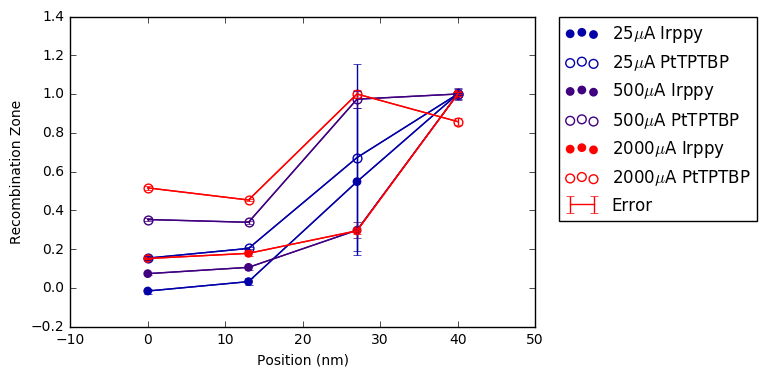

In [17]:
cs=['blue','red','green','purple','cyan','black']
from collections import OrderedDict
import pickle
S_dmp_array=[[],[],[]]
I_dmp_array=[[],[],[]]

for i,c in enumerate([25,500,2000]):
    norm=df2[df2.Current==c][df2.Position==-1][df2.Device=='11']['Intensity1']
    #print norm
    f1=df2[df2['Current']==c]
    
    #for dix,d in enumerate(sorted(set(f1['Device']))):
    f=f1[f1['Position']>-1]

    PtTPTBP_Peaks = f.groupby(['Position'])['CorrectedIntensity2'].mean()
    PtTPTBP_err = f.groupby(['Position'])['CorrectedIntensity2'].std()
    Irppy_Peaks = f.groupby(['Position'])['Intensity1'].mean()
    Irppy_err = f.groupby(['Position'])['Intensity1'].std()
    S_dmp_array[i]=list(PtTPTBP_Peaks/np.amax(PtTPTBP_Peaks))
    
    
    RZ=1-(Irppy_Peaks/list(norm)[0])
    #RZ=1-(f['Intensity1']/list(norm)[0])
    RZ=RZ/np.amax(RZ)
    I_dmp_array[i]=list(RZ)
    #plt.scatter(list(f['Position']),RZ,label=str(int(c))+'$\mu$A Irppy',facecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),edgecolor='None',s=75)#,color=cs[i%len(cs)])
    plt.scatter(Irppy_Peaks.index,RZ,label=str(int(c))+'$\mu$A Irppy',facecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),edgecolor='None',s=40)#,color=cs[i%len(cs)])
    plt.errorbar(Irppy_Peaks.index,RZ,yerr=Irppy_err/list(norm)[0],label='Error',color=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5))

    plt.plot(Irppy_Peaks.index,RZ,color=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),label=str(int(c))+'$\mu$A Irppy')

    #plt.scatter(list(f['Position']),list(f['CorrectedIntensity2'])/f['CorrectedIntensity2'].max(),label=str(int(c))+'$\mu$A PtTPTBP',edgecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),facecolor='None',s=75)#,color=cs[i%len(cs)])
    plt.scatter(PtTPTBP_Peaks.index,PtTPTBP_Peaks/PtTPTBP_Peaks.max(),label=str(int(c))+'$\mu$A PtTPTBP',edgecolor=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5),facecolor='White',s=40)#,color=cs[i%len(cs)])
    plt.errorbar(PtTPTBP_Peaks.index,PtTPTBP_Peaks/PtTPTBP_Peaks.max(),yerr=PtTPTBP_err/PtTPTBP_Peaks.max(),label='Error',color=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5))

    plt.plot(PtTPTBP_Peaks.index,PtTPTBP_Peaks/PtTPTBP_Peaks.max(),label=str(int(c))+'$\mu$A PtTPTBP',color=(((float(c)/2000.0))/1.0,0,(1-(float(c)/2000.0))/1.5))


plt.xlabel('Position (nm)')
plt.ylabel('Recombination Zone')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
pickle.dump(S_dmp_array,open(os.path.join(bdir,'A_S_dmp'),'w'))
pickle.dump(I_dmp_array,open(os.path.join(bdir,'A_I_dmp'),'w'))


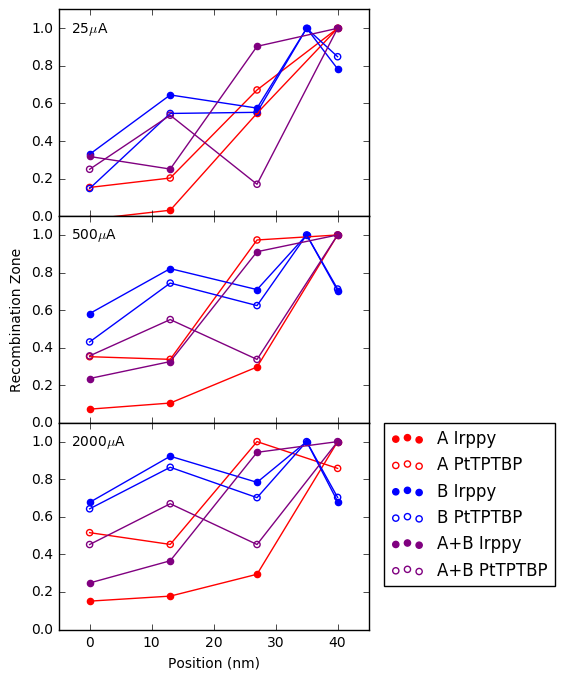

In [18]:
B_I = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\2017-12-12_Dow B RZ Measurement\\Spectra\\B_I_dmp'))
B_S = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\2017-12-12_Dow B RZ Measurement\\Spectra\\B_S_dmp'))
#C:\Users\kwher_000\Google Drive\Lab Data\2017\Dow Hosts Project\1208 - RZ Cohost
C_I = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\1208 - RZ Cohost\\C_I_dmp'))
C_S = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\1208 - RZ Cohost\\C_S_dmp'))
A_I = pickle.load(open(os.path.join(bdir,'A_I_dmp')))
A_S = pickle.load(open(os.path.join(bdir,'A_S_dmp')))
b_pos=[0,13,27,35,40]
fig=plt.figure(figsize=(4, 8), dpi= 160, facecolor='w', edgecolor='k')
for i,c in enumerate([25,500,2000]):
    plt.subplot(3,1,i+1)
    plt.scatter(positions[1:],A_I[i],label='A Irppy',edgecolor='red',facecolor='red')
    plt.scatter(positions[1:],A_S[i],label='A PtTPTBP',edgecolor='red',facecolor='None')
    plt.scatter(b_pos,B_I[i],label='B Irppy',edgecolor='blue',facecolor='blue')
    plt.scatter(b_pos,B_S[i],label='B PtTPTBP',edgecolor='blue',facecolor='None')
    plt.scatter(positions[1:],C_I[i],label='A+B Irppy',edgecolor='purple',facecolor='purple')
    plt.scatter(positions[1:],C_S[i],label='A+B PtTPTBP',edgecolor='purple',facecolor='None')
    plt.plot(positions[1:],A_I[i],label='A Irppy',color='red')
    plt.plot(positions[1:],A_S[i],label='A PtTPTBP',color='red')
    plt.plot(b_pos,B_I[i],label='B Irppy',color='blue')
    plt.plot(b_pos,B_S[i],label='B PtTPTBP',color='blue')
    plt.plot(positions[1:],C_I[i],label='A+B Irppy',color='purple')
    plt.plot(positions[1:],C_S[i],label='A+B PtTPTBP',color='purple')
    if i==2:
        plt.xlabel('Position (nm)')
    else:
        if i==1:
            plt.ylabel('Recombination Zone')
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
    
    plt.axis([-5,45,0,1.1])
    plt.text(-3,.98, str(int(c))+'$\mu$A')
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.tight_layout()
plt.show()



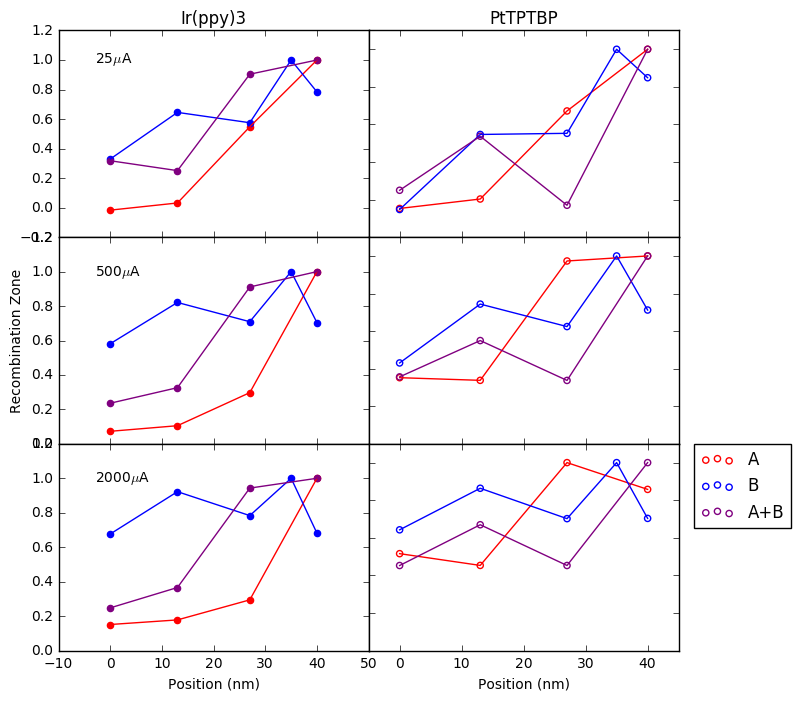

In [24]:
B_I = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\2017-12-12_Dow B RZ Measurement\\Spectra\\B_I_dmp'))
B_S = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\2017-12-12_Dow B RZ Measurement\\Spectra\\B_S_dmp'))
#C:\Users\kwher_000\Google Drive\Lab Data\2017\Dow Hosts Project\1208 - RZ Cohost
C_I = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\1208 - RZ Cohost\\C_I_dmp'))
C_S = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\1208 - RZ Cohost\\C_S_dmp'))
A_I = pickle.load(open(os.path.join(bdir,'A_I_dmp')))
A_S = pickle.load(open(os.path.join(bdir,'A_S_dmp')))
b_pos=[0,13,27,35,40]
fig=plt.figure(figsize=(8, 8), dpi= 160, facecolor='w', edgecolor='k')
for i,c in enumerate([25,500,2000]):
    plt.subplot(3,2,i*2+1)
    plt.scatter(positions[1:],A_I[i],label='A Irppy',edgecolor='red',facecolor='red')
    plt.scatter(b_pos,B_I[i],label='B Irppy',edgecolor='blue',facecolor='blue')
    plt.scatter(positions[1:],C_I[i],label='A+B Irppy',edgecolor='purple',facecolor='purple')
    plt.plot(positions[1:],A_I[i],label='A Irppy',color='red')
    plt.plot(b_pos,B_I[i],label='B Irppy',color='blue')
    plt.plot(positions[1:],C_I[i],label='A+B Irppy',color='purple')
    if i == 0:
        plt.title('Ir(ppy)3')
    if i==2:
        plt.xlabel('Position (nm)')
    else:
        if i==1:
            plt.ylabel('Recombination Zone')
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
    plt.text(-3,.98, str(int(c))+'$\mu$A')
    plt.subplot(3,2,i*2+2)
    plt.scatter(positions[1:],A_S[i],label='A',edgecolor='red',facecolor='None')
    plt.scatter(b_pos,B_S[i],label='B',edgecolor='blue',facecolor='None')
    plt.scatter(positions[1:],C_S[i],label='A+B',edgecolor='purple',facecolor='None')
    plt.plot(positions[1:],A_S[i],label='A',color='red')
    plt.plot(b_pos,B_S[i],label='B',color='blue')
    plt.plot(positions[1:],C_S[i],label='A+B',color='purple')
    if i == 0:
        plt.title('PtTPTBP')
    if i==2:
        plt.xlabel('Position (nm)')
    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    
    plt.axis([-5,45,0,1.1])
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
plt.show()

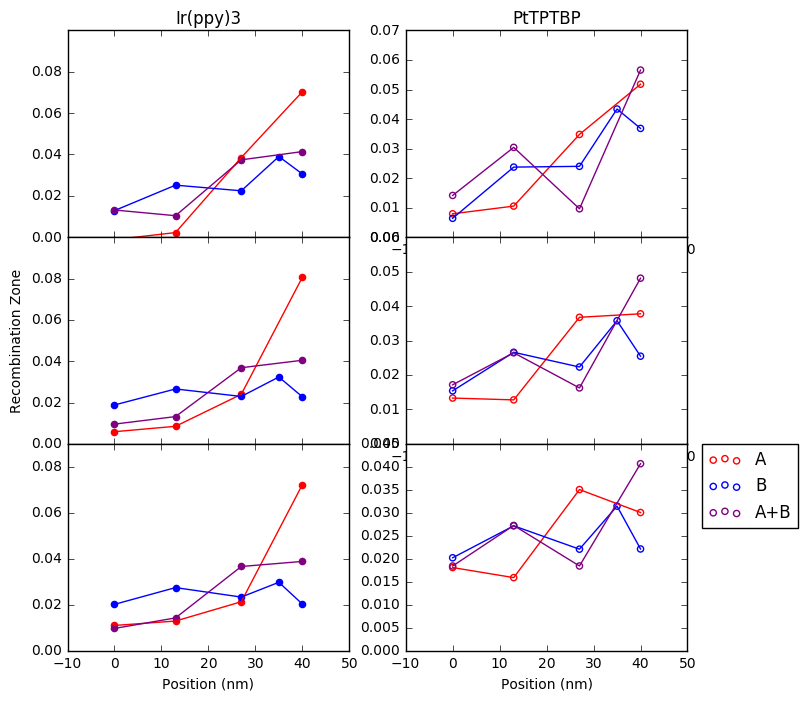

In [40]:
base
B_I = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\2017-12-12_Dow B RZ Measurement\\Spectra\\B_I_dmp'))
B_S = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\2017-12-12_Dow B RZ Measurement\\Spectra\\B_S_dmp'))
#C:\Users\kwher_000\Google Drive\Lab Data\2017\Dow Hosts Project\1208 - RZ Cohost
C_I = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\1208 - RZ Cohost\\C_I_dmp'))
C_S = pickle.load(open('C:\\Users\\kwher_000\\Google Drive\\Lab Data\\2017\\Dow Hosts Project\\1208 - RZ Cohost\\C_S_dmp'))
A_I = pickle.load(open(os.path.join(bdir,'A_I_dmp')))
A_S = pickle.load(open(os.path.join(bdir,'A_S_dmp')))
b_pos=[0,13,27,35,40]
A_I_area=np.trapz(A_I,x=positions[1:])
A_S_area=np.trapz(A_S,x=positions[1:])
B_I_area=np.trapz(B_I,x=b_pos)
B_S_area=np.trapz(B_S,x=b_pos)
C_I_area=np.trapz(C_I,x=positions[1:])
C_S_area=np.trapz(C_S,x=positions[1:])
fig=plt.figure(figsize=(8, 8), dpi= 160, facecolor='w', edgecolor='k')
for i,c in enumerate([25,500,2000]):
    plt.subplot(3,2,i*2+1)
    plt.scatter(positions[1:],A_I[i]/A_I_area[i],label='A Irppy',edgecolor='red',facecolor='red')
    plt.scatter(b_pos,B_I[i]/B_I_area[i],label='B Irppy',edgecolor='blue',facecolor='blue')
    plt.scatter(positions[1:],C_I[i]/C_I_area[i],label='A+B Irppy',edgecolor='purple',facecolor='purple')
    plt.plot(positions[1:],A_I[i]/A_I_area[i],label='A Irppy',color='red')
    plt.plot(b_pos,B_I[i]/B_I_area[i],label='B Irppy',color='blue')
    plt.plot(positions[1:],C_I[i]/C_I_area[i],label='A+B Irppy',color='purple')
    plt.ylim(ymin=0)
    frame1 = plt.gca()
    if i == 0:
        plt.title('Ir(ppy)3')
    if i==2:
        plt.xlabel('Position (nm)')
    else:
        if i==1:
            plt.ylabel('Recombination Zone')
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
    #plt.text(-3,.98, str(int(c))+'$\mu$A')
    #frame1.axes.text(.1,.9, str(int(c))+'$\mu$A')
    plt.subplot(3,2,i*2+2)
    plt.scatter(positions[1:],A_S[i]/A_S_area[i],label='A',edgecolor='red',facecolor='None')
    plt.scatter(b_pos,B_S[i]/B_S_area[i],label='B',edgecolor='blue',facecolor='None')
    plt.scatter(positions[1:],C_S[i]/C_S_area[i],label='A+B',edgecolor='purple',facecolor='None')
    plt.plot(positions[1:],A_S[i]/A_S_area[i],label='A',color='red')
    plt.plot(b_pos,B_S[i]/B_S_area[i],label='B',color='blue')
    plt.plot(positions[1:],C_S[i]/C_S_area[i],label='A+B',color='purple')
    plt.ylim(ymin=0)
    if i == 0:
        plt.title('PtTPTBP')
    if i==2:
        plt.xlabel('Position (nm)')
    #frame1 = plt.gca()
    #frame1.axes.yaxis.set_ticklabels([])
    
    #plt.axis([-5,45,0,1.1])
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplots_adjust(wspace=.2, hspace=0)
#plt.tight_layout()
plt.show()